# Project 1: SAT & ACT Analysis

## Problem Statement

What are the actions and strategies that can be taken to increase SAT participation rates among high school students in US States?

## Executive Summary

The ACT has been outpacing the SAT in participation rates in recent years, steadily gaining ground across the country. The College Board implemented some major design changes to the SAT in 2016, in an attempt to revitalize their test. 

In this project, we take a look at SAT and ACT participation and scoring data by state in 2017 and 2018, to see if we can glean any strategies the College Board might employ to increase SAT participation rates moving forward.

Based on 2017 and 2018 SAT data, there is a great disparity in SAT participation rates across states.

College Board wants to improve SAT participation rates across US States.

This project aims to investigate why certain states have low SAT participations rates and investigate whether there are any underlying trends or factors affecting a State’s SAT Participation Rate.

This project will employ exploratory and statistical data analysis to uncover trends and insights to tackle this problem of low SAT participation rates among certain US States.

Visualizations Plotted:

- Correlation Heatmap
- Tableau Geographical Visualizations
- Histograms
- Scatter Plots
- Box-plots


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# reading the csv files
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
# First 10 rows of the sat_2017 dataset
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
# First 10 rows of the act_2017 dataset
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [5]:
# Exploring the sat_2017 data's summary statistics
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [6]:
# Number of Columns and Rows of the sat_2017 dataset
sat_2017.shape

(51, 5)

**Looking at the shape of sat_2017:**

**- There are 51 rows for 51 US states.**

**- There are 5 Columns: State, Participation, Evidence-Based Reading and Writing, Math, Total (ERW + Math = 800)**

In [7]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [8]:
# Exploring the act_2017 data's summary statistics
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [9]:
# Number of Columns and Rows of the act_2017 dataset
act_2017.shape

(52, 7)

**Looking at the shape of act_2017:**

**- There are 52 rows for 51 US states and a National Average Row.**

**- There are 7 Columns: State, Participation, English, Math, Reading, Science, Composite.**

In [10]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


**Answer:**

**- For the sat_2017 dataset, there are 51 rows in total, representing 51 US states, along with 5 Columns: State, SAT participation level, Evidence Based Reading and Writing, Math and Total (Combined Score of EBRW and Math).**


**- The scores in each row are averages of the scores obtained by students in each respective State in the US. The max score for the Evidence Based Reading and Writing Section and the Math Section are each 800. Thus, the max cumulative score, denoted by the Total Column, is 800 + 800 = 1600**


**- However, there is no National Average Score (Row) in the sat_2017 dataset as compared to the act_2017 dataset.**


**- For the act_2017 dataset, there are 52 rows in total, representing 51 US States as well as an additional row representing the National Average. There are 7 columns in this dataset: State, ACT participation Level, English, Math, Reading, Science, Composite Score.**

#### 4a. Does the data look complete? 

In [11]:
# Checking whether there are any null values in the act_2017 data
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [12]:
# Checking whether there are any null values in the sat_2017 data
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

**Answer: Given that there are no null values in the act_2017 and sat_2017 datasets, they are thus complete.**

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer:** 

In [13]:
# Summary Statistics of sat_2017
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


**Theoretically, the minimum SAT score for Evidence-Based Reading and Writing (ERW) and Math are 200 while the minimum Total Score is 400.**

- In sat_2017, minimum Math score was 52, minimum ERW score was 482 and minimum Total score was 950.

- The minimum Math score of 52 is an outlier and it is highly probable that it is an incorrect observation value which we will investigate later on.

**Theoretically, the maximum SAT score for Evidence-Based Reading and Writing (ERW) and Math are 800 each respectively.**

**The maximum Total Score is thus 800 + 800 = 1600.**

- In sat_2017, maximum Math score was 651, maximum ERW score was 644 and maximum Total score was 1295.

In [14]:
# Summary Statistics of act_2017
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


**Theoretically, the minimum ACT score for English, Math, Reading, Science are each 1.**

- In act_2017, minimum English score was 16.3, minimum Math score was 18.0, minimum Reading score was 18.1 and minimum Science score was 2.3.

- The minimum Science score of 2.3 is an outlier and it is highly probable that it is an incorrect observation value which we will investigate later on.

**Theoretically, the maximum ACT score for English, Math, Reading, Science are 36 each respectively.**

- In act_2017, maximum English score was 25.5, maximum Math score was 25.3, maximum Reading score was 26.0 and maximum Science score was 24.9.

**The Composite scores are not included in the summary statistics above as it currently has the object datatype as well as one incorrect value which we will investgiate later on.**

- Theoretically, the maximum Composite score is 100 and the minimum Composite score is 0.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [15]:
# Wyoming's composite score should be 20.2, instead of 20.2x
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [16]:
# fixing error, replace '20.2x' with '20.2'
act_2017.loc[act_2017['State'] == 'Wyoming', 'Composite'] = 20.2

In [17]:
# verify that error has been fixed
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


In [18]:
# Changing the Composite Column from Object type to Float64 type
act_2017['Composite'] = act_2017['Composite'].apply(pd.to_numeric)
act_2017['Composite'].dtype

dtype('float64')

**Based on the official data sources:**

- ACT_2017: https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf

- SAT_2017: https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/

- Our dataset sat_2017 is missing a national average row.

- Furthermore, there is 1 incorrect value in our sat_2017 dataset and act_2017 dataset respectively after checking the official sources.

In [19]:
# Incorrect value in act_2017, should be '23.2' instead of '2.3'
act_2017['Science'].min()

2.3

In [20]:
# Fixing the incorrect value, replace '2.3' with '23.2'
act_2017.loc[act_2017['State'] == 'Maryland', 'Science'] = 23.2

In [21]:
# Incorrect value in sat_2017, should be '524' instead of '52'
sat_2017['Math'].min()

52

In [22]:
# Fixing the incorrect value, replace '52' with '524'
sat_2017.loc[sat_2017['State'] == 'Maryland', 'Math'] = 524

#### 5. What are your data types? 
Display the data types of each feature. 

In [23]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [24]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer:**

- For the sat_2017 dataset, the 'Participation' column is an object when it should be a float since it is a percentage rate.

- For the act_2017 dataset, the 'Participation' column is an object when it should be a float since it is a percentage rate. 

- Initially, the 'Composite' column was an object but we have since converted it into a float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [25]:
# Defining a function that will convert a string to a float
def change_to_float(n):
    """Remove the % sign at the end of the string"""
    n = n.strip('%')
    """Convert the string to a float type"""
    n = float(n)
    return n

- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [26]:
# Changing sat_2017 Participation column to a float type
sat_2017['Participation'] = sat_2017['Participation'].map(change_to_float)
sat_2017['Participation'].head()

0     5.0
1    38.0
2    30.0
3     3.0
4    53.0
Name: Participation, dtype: float64

In [27]:
# Changing act_2017 Participation column to a float type
act_2017['Participation'] = act_2017['Participation'].map(change_to_float)
act_2017['Participation'].head()

0     60.0
1    100.0
2     65.0
3     62.0
4    100.0
Name: Participation, dtype: float64

- Display the data types again to confirm they are correct.

In [28]:
# Checking sat_2017 revised data types
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [29]:
# Checking act_2017 revised data types
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [30]:
# View column names of sat_2017
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [31]:
# Renaming sat_2017 column names based on above guidelines
sat_2017.rename(columns={'State': 'state',
                         'Participation': 'sat_2017_participation',
                         'Evidence-Based Reading and Writing': 'sat_2017_erw',
                         'Math': 'sat_2017_math',
                         'Total': 'sat_2017_total'}, inplace = True)

In [32]:
# Check that column names are updated
sat_2017.columns

Index(['state', 'sat_2017_participation', 'sat_2017_erw', 'sat_2017_math',
       'sat_2017_total'],
      dtype='object')

In [33]:
# View column names of act_2017
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [34]:
# Renaming act_2017 column names based on above guidelines
act_2017.rename(columns={'State':'state', 
                         'Participation':'act_2017_participation',
                         'English':'act_2017_english',
                         'Math':'act_2017_math',
                         'Reading':'act_2017_reading',
                         'Science':'act_2017_science',
                         'Composite':'act_2017_composite'},inplace=True)

In [35]:
# Check that column names are updated
act_2017.columns

Index(['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|List of 51 US States| 
|sat_2018_participation|float64|SAT|Student Participation Rate per State in taking SAT tests in 2018|
|sat_2018_erw|int64|SAT|Average SAT Evidence-based Reading and Writing Score per State in 2018| 
|sat_2018_math|int64|SAT|Average SAT Math Score per State in 2018| 
|sat_2018_total|int64|SAT|Average Total SAT Score per State in 2018|
|act_2018_participation|float64|ACT|Student Participation Rate per State in taking ACT tests in 2018| 
|act_2018_composite|float64|ACT|Average ACT Composite Score per State in 2018|
|act_2018_english|float64|ACT|Average ACT English Score per State in 2018| 
|act_2018_math|float64|ACT|Average ACT Math Score per State in 2018| 
|act_2018_reading|float64|ACT|Average ACT Reading Score per State in 2018| 
|act_2018_science|float64|ACT|Average ACT Science Score per State in 2018| 
|sat_2017_participation|float64|SAT|Student Participation Rate per State in taking SAT tests in 2017|
|sat_2017_erw|int64|SAT|Average SAT Evidence-based Reading and Writing Score per State in 2017| 
|sat_2017_math|int64|SAT|Average SAT Math Score per State in 2017| 
|sat_2017_total|int64|SAT|Average Total SAT Score per State in 2017| 
|act_2017_participation|float64|ACT|Student Participation Rate per State in taking ACT tests in 2017| 
|act_2017_english|float64|ACT|Average ACT English Score per State in 2017| 
|act_2017_math|float64|ACT|Average ACT Math Score per State in 2017| 
|act_2017_reading|float64|ACT|Average ACT Reading Score per State in 2017| 
|act_2017_science|float64|ACT|Average ACT Science Score per State in 2017| 
|act_2017_composite|float64|ACT|Average ACT Composite Score per State in 2017|





#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

**The ACT Dataset has an extra National Average Score Row that is missing from the SAT Dataset. Hence, we will remove this from the act_2017 dataframe to be consistent across datasets.**

In [36]:
# View first 5 rows of act_2017
act_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [37]:
# Dropping the National Average Row in act_2017
act_2017 = act_2017.drop(0) #drop first row containing the national average data
act_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [38]:
# Common column that both dataframes share is state, hence we will merge on state
combined_2017 = pd.merge(sat_2017, act_2017, on='state')

In [39]:
combined_2017.head()

,state,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [40]:
# save combined dataset into a new csv
combined_2017.to_csv('../data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [41]:
# Importing 2018 data
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

In [42]:
# Explore sat_2018 by viewing first 5 rows
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [43]:
# Check whether there are any duplicate rows per State
sat_2018['State'].value_counts().head()

Pennsylvania            1
Nebraska                1
Wyoming                 1
New Mexico              1
District of Columbia    1
Name: State, dtype: int64

In [44]:
# Check whether there are any null values
sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [45]:
# Checking datatypes of each column
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [46]:
# Checking whether there are any outliers in terms of min and max values
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [47]:
# Explore act_2018 by viewing first 5 rows
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [48]:
# Check whether there are any duplicate rows per State
act_2018['State'].value_counts().head()

Pennsylvania            1
Nebraska                1
Wyoming                 1
New Mexico              1
District of Columbia    1
Name: State, dtype: int64

In [49]:
# Check whether there are any null values
act_2018.isnull().sum()

State                            0
Percentage of Students Tested    0
Average Composite Score          0
Average English Score            0
Average Math Score               0
Average Reading Score            0
Average Science Score            0
dtype: int64

In [50]:
# Checking datatypes of each column
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [51]:
# Checking whether there are any outliers in terms of min and max values
act_2018.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [52]:
# Changing sat_2018 Participation column to a float type
sat_2018['Participation'] = sat_2018['Participation'].map(change_to_float)
sat_2018['Participation'].head()

0     6.0
1    43.0
2    29.0
3     5.0
4    60.0
Name: Participation, dtype: float64

In [53]:
# Changing act_2018 Participation column to a float type
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].astype(float)
act_2018['Percentage of Students Tested'].head()

0    100.0
1     33.0
2     66.0
3    100.0
4     27.0
Name: Percentage of Students Tested, dtype: float64

In [54]:
#renaming sat_2018 column names
sat_2018.rename(columns={'State':'state', 
                         'Participation':'sat_2018_participation',
                         'Evidence-Based Reading and Writing':'sat_2018_erw',
                         'Math':'sat_2018_math',
                         'Total':'sat_2018_total'},inplace=True)

In [55]:
# Check that column names are updated
sat_2018.columns

Index(['state', 'sat_2018_participation', 'sat_2018_erw', 'sat_2018_math',
       'sat_2018_total'],
      dtype='object')

In [56]:
#renaming act_2018 column names
act_2018.rename(columns={'State':'state',
                                 'Percentage of Students Tested':'act_2018_participation',
                                 'Average Composite Score':'act_2018_composite',
                                 'Average English Score':'act_2018_english',
                                 'Average Math Score':'act_2018_math', 
                                 'Average Reading Score':'act_2018_reading',
                                 'Average Science Score':'act_2018_science'},inplace=True)

In [57]:
# Check that column names are updated
act_2018.columns

Index(['state', 'act_2018_participation', 'act_2018_composite',
       'act_2018_english', 'act_2018_math', 'act_2018_reading',
       'act_2018_science'],
      dtype='object')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [58]:
# Combining sat_2018 and act_2018 into one combined dataset
combined_2018 = pd.merge(sat_2018, act_2018, on='state')
combined_2018.head()

,state,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,act_2018_science
0,Alabama,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,22.1


In [59]:
#combining combined_2017 and combined_2018 into one combined dataset
final = pd.merge(combined_2018, combined_2017, on='state')
final.head()

,state,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,...,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,...,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,...,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,...,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,...,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,...,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


In [60]:
# Exporting data to csv
final.to_csv('../data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [61]:
# Transpose the output of pandas describe method
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_2018_participation,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
sat_2018_erw,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
sat_2018_math,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
sat_2018_total,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0
act_2018_participation,51.0,61.647059,34.080976,7.0,28.50,66.0,100.00,100.0
act_2018_composite,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6
act_2018_english,51.0,20.988235,2.446356,16.6,19.10,20.2,23.70,26.0
act_2018_math,51.0,21.125490,2.035765,17.8,19.40,20.7,23.15,25.2
act_2018_reading,51.0,22.015686,2.167245,18.0,20.45,21.6,24.10,26.1
act_2018_science,51.0,21.345098,1.870114,17.9,19.85,21.1,23.05,24.9


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [62]:
# Defining Standard Deviation Function
def stddev(X):
    """Compute Standard Deviation Formula"""
    mean = sum(X)/len(X)
    var = 0.0
    for i in X:
        var = var + (i - mean)**2
    return (var/len(X))**0.5

In [63]:
# Testing stddev code on a column to check whether it works
stddev(final['sat_2018_participation'])

36.946619223539415

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [64]:
# Applying the standard deviation formula to all columns except the state column which is an object type
final_sd = {x: stddev(final[x]) for x in final.columns if final[x].dtypes != object}
final_sd

{'sat_2018_participation': 36.946619223539415,
 'sat_2018_erw': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433,
 'act_2018_participation': 33.745194881997506,
 'act_2018_composite': 2.0855261815801147,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'sat_2017_participation': 34.92907076664508,
 'sat_2017_erw': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2017_participation': 31.824175751231806,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989}

In [65]:
# Using numpy's std method
np.std(final).head()

sat_2018_participation    36.946619
sat_2018_erw              47.034610
sat_2018_math             47.301946
sat_2018_total            93.227424
act_2018_participation    33.745195
dtype: float64

In [66]:
# Using pandas describe() method
final.describe().T['std'].head()

sat_2018_participation    37.314256
sat_2018_erw              47.502627
sat_2018_math             47.772623
sat_2018_total            94.155083
act_2018_participation    34.080976
Name: std, dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer:**

- The values calculated using the manual standard deviation formula (stddev) matches the values generated by numpy's std method. However, these values are different from the values generated by the pandas describe( ) method.


- The manual standard deviation formula calculates the population standard deviation (divide by n) while the standard deviation formula used by the pandas describe( ) method calculates the sample standard deviation (divide by (n-1)).


- The population standard deviation is a parameter, which is a fixed value calculated from every individual in the population. A sample standard deviation is a statistic. This means that it is calculated from only some of the individuals in a population. Since the sample standard deviation depends upon the sample, it has greater variability. Thus the standard deviation of the sample is greater than that of the population.


#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

In [67]:
# States that have the highest participation rates for 2017 SAT
final.sort_values(by=['sat_2017_participation'], ascending=False).head(5)[['state','sat_2017_participation']]

,state,sat_2017_participation
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


**Top 5 states that have the highest participation rates for 2017 SAT:**

- District of Columbia
- Michigan
- Connecticut
- Delaware
- New Hampshire

In [68]:
# States that have the lowest participation rates for 2017 SAT
final.sort_values(by=['sat_2017_participation'], ascending=True).head(10)[['state','sat_2017_participation']]

,state,sat_2017_participation
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0
23,Minnesota,3.0
50,Wyoming,3.0


**Top 10 states that have the lowest participation rates for 2017 SAT:**

- North Dakota
- Mississippi
- Iowa
- Missouri
- Utah
- South Dakota
- Nebraska
- Wisconsin
- Minnesota
- Wyoming

In [69]:
# States that have the highest participation rates for 2018 SAT
final.sort_values(by=['sat_2018_participation'], ascending=False).head(5)[['state','sat_2018_participation']]

,state,sat_2018_participation
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0


**Top 5 states that have the highest participation rates for 2018 SAT:**

- Colorado
- Connecticut
- Delaware
- Michigan
- Idaho

In [70]:
# States that have the lowest participation rates for 2018 SAT
final.sort_values(by=['sat_2018_participation'], ascending=True).head(10)[['state','sat_2018_participation']]

,state,sat_2018_participation
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0
24,Mississippi,3.0
15,Iowa,3.0
44,Utah,4.0
23,Minnesota,4.0
18,Louisiana,4.0


**Top 10 states that have the lowest participation rates for 2018 SAT:**

- North Dakota
- Wyoming
- South Dakota
- Nebraska
- Wisconsin
- Mississippi
- Iowa
- Utah
- Minnesota
- Louisiana

In [71]:
# States that have the highest participation rates for 2017 ACT
final.sort_values(by=['act_2017_participation'], ascending=False).head(17)[['state','act_2017_participation']]

,state,act_2017_participation
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
35,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


**Top 17 states that have the highest participation rates for 2017 ACT:**

- Alabama
- Kentucky
- Wisconsin
- Utah
- Tennesse
- South Carolina
- Oklahoma
- North Carolina
- Nevada
- Montana
- Mississippi
- Minnesota
- Louisiana
- Missouri
- Wyoming
- Colorado
- Arkansas

In [72]:
# States that have the lowest participation rates for 2017 ACT
final.sort_values(by=['act_2017_participation'], ascending=True).head(5)[['state','act_2017_participation']]

,state,act_2017_participation
19,Maine,8.0
29,New Hampshire,18.0
7,Delaware,18.0
39,Rhode Island,21.0
38,Pennsylvania,23.0


**Top 5 states that have the lowest participation rates for 2017 ACT:**

- Maine
- New Hampshire
- Delaware
- Rhode Island
- Pennsylvania

In [73]:
# States that have the highest participation rates for 2018 ACT
final.sort_values(by=['act_2018_participation'], ascending=False).head(17)[['state','act_2018_participation']]

,state,act_2018_participation
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Ohio,100.0
35,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0


**Top 17 states that have the highest participation rates for 2018 ACT:**

- Alabama
- Kentucky
- Wisconsin
- Utah
- Tennesse
- South Carolina
- Ohio
- Oklahoma
- North Carolina
- Nevada
- Nebraska
- Montana
- Mississippi
- Louisiana
- Missouri
- Wyoming
- Arkansas

In [74]:
# States that have the lowest participation rates for 2018 ACT
final.sort_values(by=['act_2018_participation'], ascending=True).head(5)[['state','act_2018_participation']]

,state,act_2018_participation
19,Maine,7.0
39,Rhode Island,15.0
29,New Hampshire,16.0
7,Delaware,17.0
38,Pennsylvania,20.0


**Top 5 states that have the lowest participation rates for 2018 ACT:**

- Maine
- Rhode Island
- New Hampshire
- Delaware
- Pennsylvania

In [75]:
# States that have the highest mean total score for 2017 SAT
final.sort_values(by=['sat_2017_total'], ascending=False).head(5)[['state','sat_2017_total']]

,state,sat_2017_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


**Top 5 states that have the highest mean total score for 2017 SAT:**

- Minnesota
- Wisconsin
- Iowa
- Missouri
- Kansas

In [76]:
# States that have the lowest mean total score for 2017 SAT
final.sort_values(by=['sat_2017_total'], ascending=True).head(5)[['state','sat_2017_total']]

,state,sat_2017_total
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


**Top 5 states that have the lowest mean total score for 2017 SAT:**
    
- District of Columbia
- Delaware
- Idaho
- Michigan
- Maine

In [77]:
# States that have the highest mean total score for 2018 SAT
final.sort_values(by=['sat_2018_total'], ascending=False).head(5)[['state','sat_2018_total']]

,state,sat_2018_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


**Top 5 states that have the highest mean total score for 2018 SAT:**

- Minnesota
- Wisconsin
- North Dakota
- Iowa
- Kansas

In [78]:
# Using Masking to get highest state for mean total score for 2018 SAT
sat_2018_total_max = final['sat_2018_total'].max()
final[final['sat_2018_total'] == sat_2018_total_max][['state', 'sat_2018_total']]

,state,sat_2018_total
23,Minnesota,1298


In [79]:
# States that have the lowest mean total score for 2018 SAT
final.sort_values(by=['sat_2018_total'], ascending=True).head(5)[['state','sat_2018_total']]

,state,sat_2018_total
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


**Top 5 states that have the lowest mean total score for 2018 SAT:**

- District of Columbia
- Delaware
- West Virginia
- Idaho
- Utah

In [80]:
# Using Masking to get lowest state for mean total score for 2018 SAT
sat_2018_total_min = final['sat_2018_total'].min()
final[final['sat_2018_total'] == sat_2018_total_min][['state', 'sat_2018_total']]

,state,sat_2018_total
8,District of Columbia,977


In [81]:
# States that have the highest composite score for 2017 ACT
final.sort_values(by=['act_2017_composite'], ascending=False).head(5)[['state','act_2017_composite']]

,state,act_2017_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


**Top 5 states that have the highest composite score for 2017 ACT:**

- New Hampshire
- Massachusetts
- Connecticut
- Maine
- District of Columbia

In [82]:
# States that have the lowest composite score for 2017 ACT
final.sort_values(by=['act_2017_composite'], ascending=True).head(5)[['state','act_2017_composite']]

,state,act_2017_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


**Top 5 states that have the lowest composite score for 2017 ACT:**

- Nevada
- Mississippi
- South Carolina
- Hawaii
- North Carolina

In [83]:
# States that have the highest composite score for 2018 ACT
final.sort_values(by=['act_2018_composite'], ascending=False).head(5)[['state','act_2018_composite']]

,state,act_2018_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


**Top 5 states that have the highest composite score for 2018 ACT:**

- Connecticut
- Massachusetts
- New Hampshire
- New York
- Michigan

In [84]:
# States that have the lowest composite score for 2018 ACT
final.sort_values(by=['act_2018_composite'], ascending=True).head(5)[['state','act_2018_composite']]

,state,act_2018_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


**Top 5 states that have the lowest composite score for 2018 ACT:**

- Nevada
- South Carolina
- Mississippi
- Hawaii
- Alabama

- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

In [85]:
# States with 100% participation on SAT in 2017 and have a rate change YOY
final[(final['sat_2017_participation'] == 100.0) & (final['sat_2018_participation'] < 100.0)]

,state,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,...,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
8,District of Columbia,92.0,497,480,977,32.0,23.6,23.7,22.7,24.4,...,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2


**The only state with 100% participation on SAT in 2017 and have a rate change YOY is District of Columbia.**

In [86]:
# States with 100% participation on SAT in 2018 and have a rate change YOY
final[(final['sat_2018_participation'] == 100.0) & (final['sat_2017_participation'] < 100.0)]

,state,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,...,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
5,Colorado,100.0,519,506,1025,30.0,23.9,23.9,23.2,24.4,...,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8
12,Idaho,100.0,508,493,1001,36.0,22.3,21.9,21.6,23.2,...,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.3


**The states with 100% participation on SAT in 2018 and have a rate change YOY is Colorado and Idaho.**

In [87]:
# States with 100% participation on ACT in 2017 and have a rate change YOY
final[(final['act_2017_participation'] == 100.0) & (final['act_2018_participation'] < 100.0)]

,state,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,...,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
5,Colorado,100.0,519,506,1025,30.0,23.9,23.9,23.2,24.4,...,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8
23,Minnesota,4.0,643,655,1298,99.0,21.3,20.2,21.4,21.7,...,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,21.5


**The states with 100% participation on ACT in 2017 and have a rate change YOY is Colorado and Minnesotra.**

In [88]:
# States with 100% participation on ACT in 2018 and have a rate change YOY
final[(final['act_2018_participation'] == 100.0) & (final['act_2017_participation'] < 100.0)]

,state,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,...,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
27,Nebraska,3.0,629,623,1252,100.0,20.1,19.4,19.8,20.4,...,3.0,629,625,1253,84.0,20.9,20.9,21.9,21.5,21.4
36,Ohio,18.0,552,547,1099,100.0,20.3,19.3,20.3,20.8,...,12.0,578,570,1149,75.0,21.2,21.6,22.5,22.0,22.0


**The states with 100% participation on ACT in 2018 and have a rate change YOY is Nebraska and Ohio.**

In [90]:
# States with >50% participation on ACT and SAT in 2017
final[(final['act_2017_participation'] > 50.0) & (final['sat_2017_participation'] > 50.0)]

,state,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,...,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
9,Florida,56.0,550,549,1099,66.0,19.9,19.2,19.3,21.1,...,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8
10,Georgia,70.0,542,522,1064,53.0,21.4,20.9,20.7,21.2,...,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,21.4
11,Hawaii,56.0,480,530,1010,89.0,18.9,18.2,19.0,19.1,...,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0


**The states with >50% participation on ACT and SAT in 2017 are Florida, Georgia, Hawaii.**

In [91]:
# States with >50% participation on ACT and SAT in 2018
final[(final['act_2018_participation'] > 50.0) & (final['sat_2018_participation'] > 50.0)]

,state,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total,act_2018_participation,act_2018_composite,act_2018_english,act_2018_math,act_2018_reading,...,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
9,Florida,56.0,550,549,1099,66.0,19.9,19.2,19.3,21.1,...,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8
10,Georgia,70.0,542,522,1064,53.0,21.4,20.9,20.7,21.2,...,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,21.4
11,Hawaii,56.0,480,530,1010,89.0,18.9,18.2,19.0,19.1,...,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0
33,North Carolina,52.0,554,543,1098,100.0,19.1,18.0,19.3,19.5,...,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,19.1
40,South Carolina,55.0,547,523,1070,100.0,18.3,17.3,18.2,18.6,...,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,18.7


**The states with >50% participation on ACT and SAT in 2018 are Florida, Georgia, Hawaii, North Carolina, South Carolina.**

**Since the key focus of this project analysis is to identify where money is best spent to improve SAT and ACT participation rates:**

- For SAT Participation Rate, US states that have consistently been in the bottom 10 are **North Dakota, South Dakota, Mississippi, Iowa, Utah, Wisconsin, Nebraska, Minnesota, Wyoming.**

- For ACT Participation Rate, US states that have consistently been in the bottom 5 are **Maine, New Hampshire, Delaware, Rhode Island, Pennsylvania.**

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

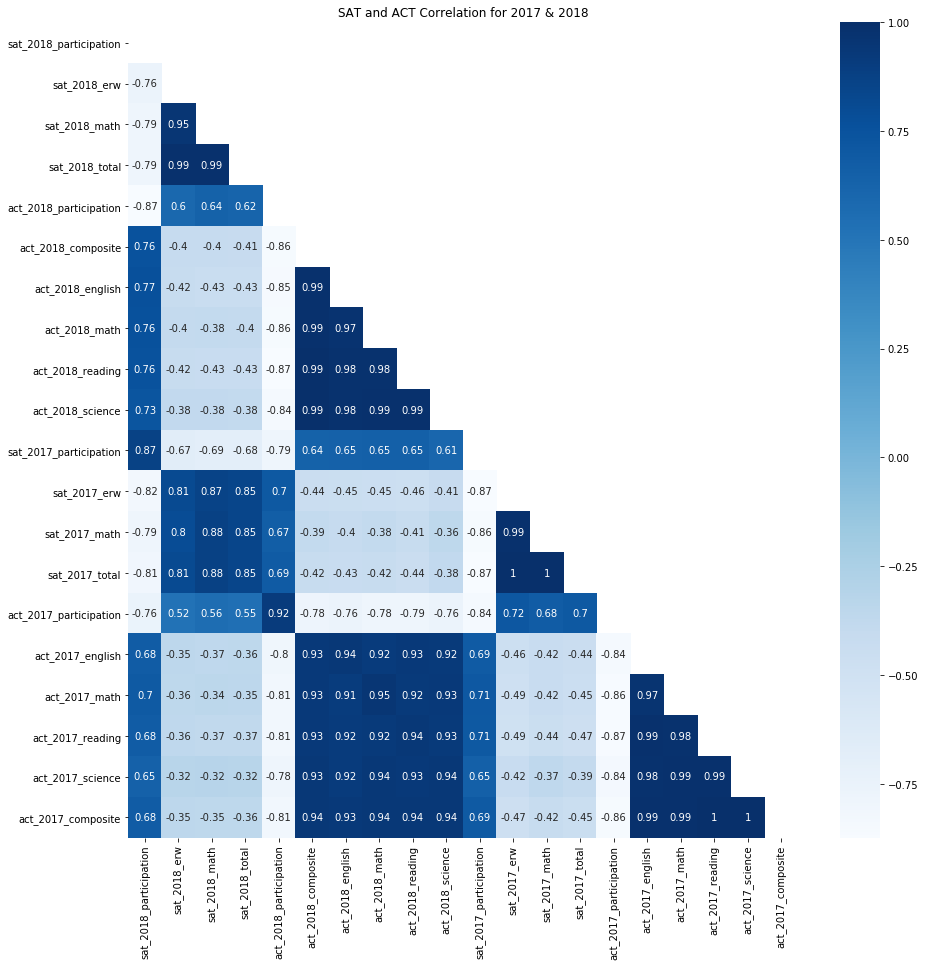

In [92]:
# Visualizing correlations with seaborn heatmap
custom_mask = np.zeros_like(final.corr()) 
custom_mask[np.triu_indices_from(custom_mask)] = True
plt.figure(figsize = (15,15))
plt.title('SAT and ACT Correlation for 2017 & 2018') #add a title to my seaborn heatmap
sns.heatmap(final.corr(), annot = True, mask = custom_mask, cmap="Blues")

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [93]:
# Defining custom function to subplot histograms
plt.style.use('bmh')

def subplot_histograms(dataframe, list_of_columns, list_of_titles, ylabel, xlabel, figtitle):
    """Defining a Function to subplot Histograms"""
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(25, 25))
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column], bins = 15)
        
    for i, title in enumerate(list_of_titles):
        ax[i].set_title(title, fontsize=18)
        ax[i].set_ylabel(ylabel, fontsize = 16)
        ax[i].set_xlabel(xlabel, fontsize = 16)
        ax[i].set_title(title, fontsize=18)
        fig.suptitle(figtitle, size=18)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

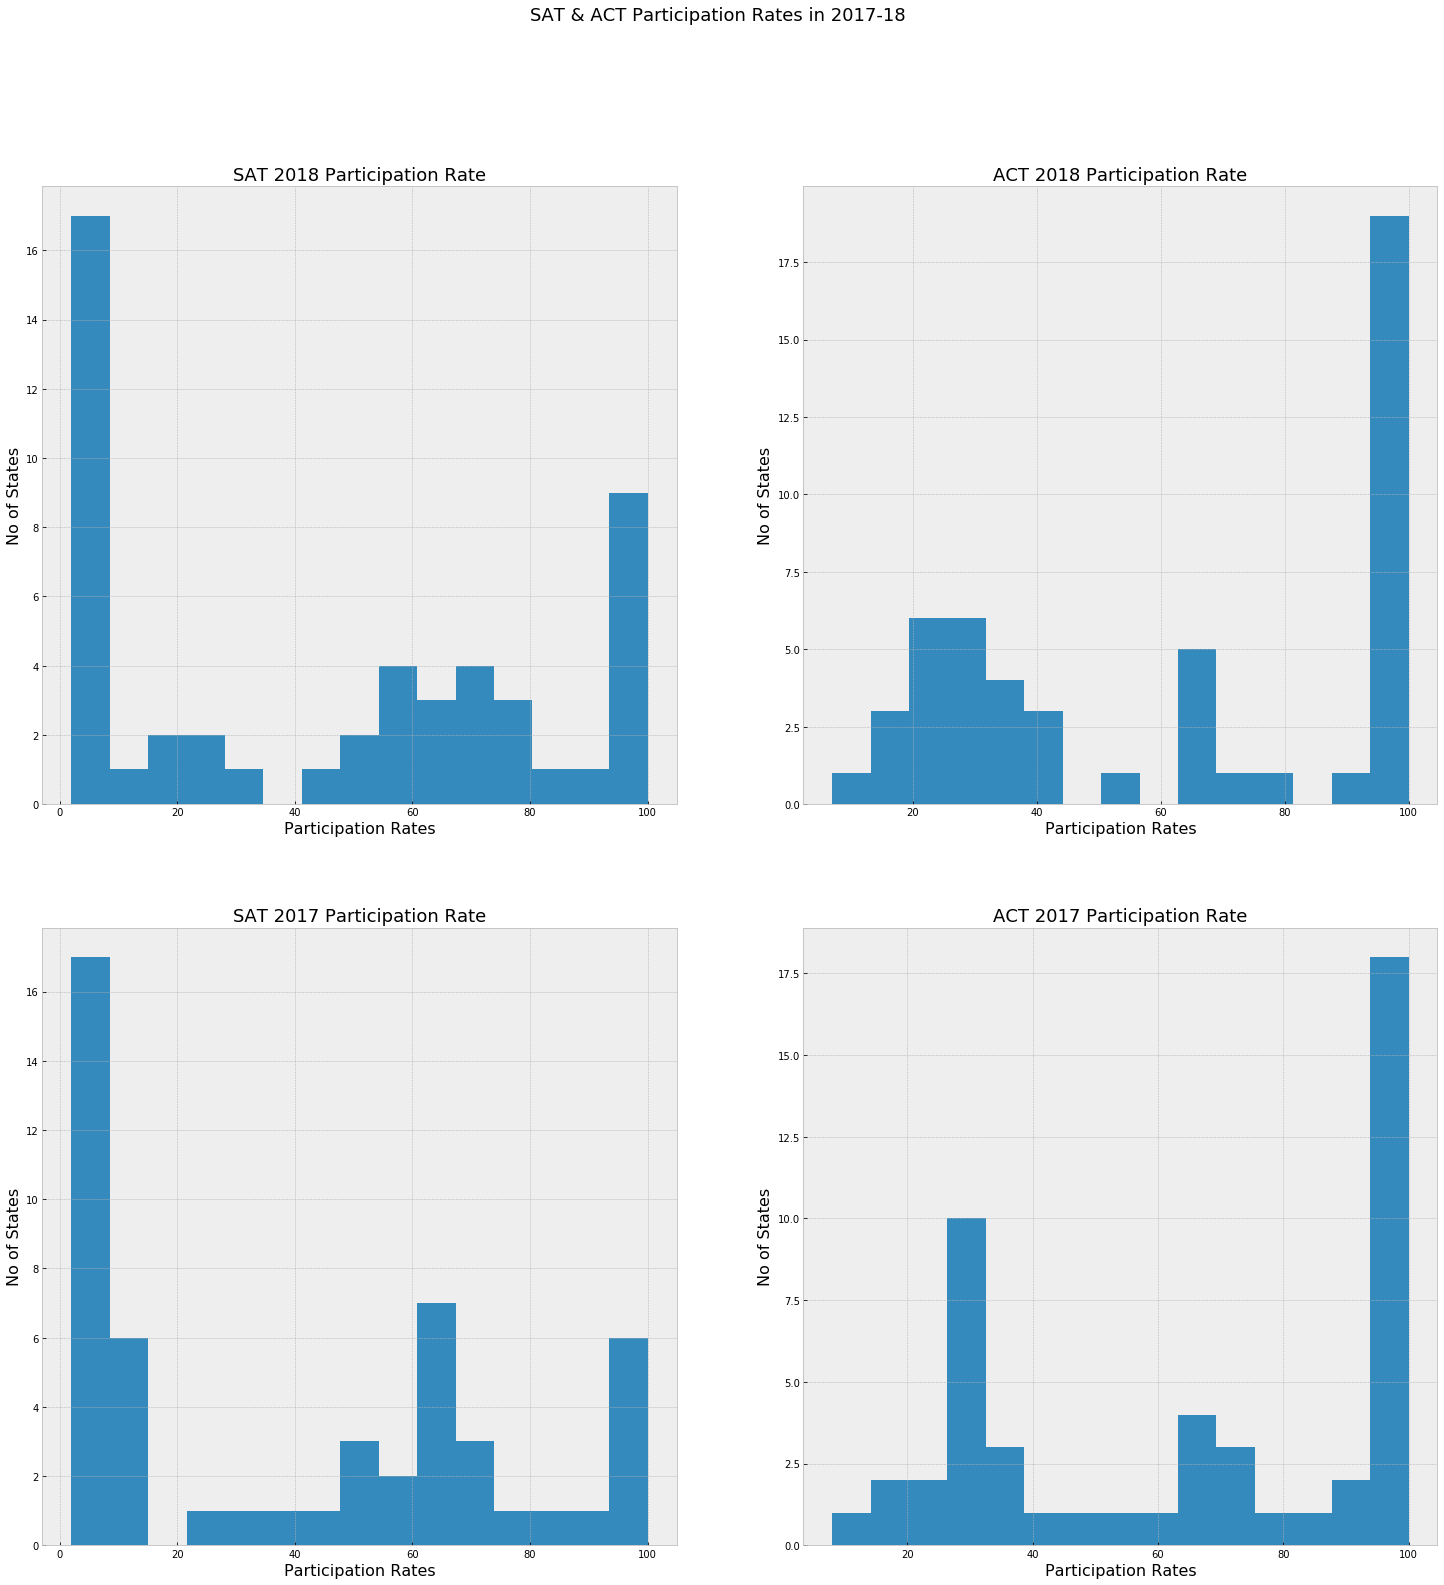

In [94]:
# Plotting Histograms for participation rates for SAT & ACT
final_col = list(final.columns)
final_col = ['sat_2018_participation','act_2018_participation', 'sat_2017_participation','act_2017_participation']
titles = ['SAT 2018 Participation Rate', 'ACT 2018 Participation Rate', 'SAT 2017 Participation Rate', 'ACT 2017 Participation Rate']
subplot_histograms(final,final_col, titles, "No of States","Participation Rates","SAT & ACT Participation Rates in 2017-18")

**These histograms are biomodal in the sense that they generally have 2 peaks. Based on my observations, there appear to be large number of states participating in ACT tests exclusively as well as a large number of states participating in SAT tests exclusively. This is likely the case as students in the US are minimally required to complete eiither the SAT or ACT for US College Applications.**

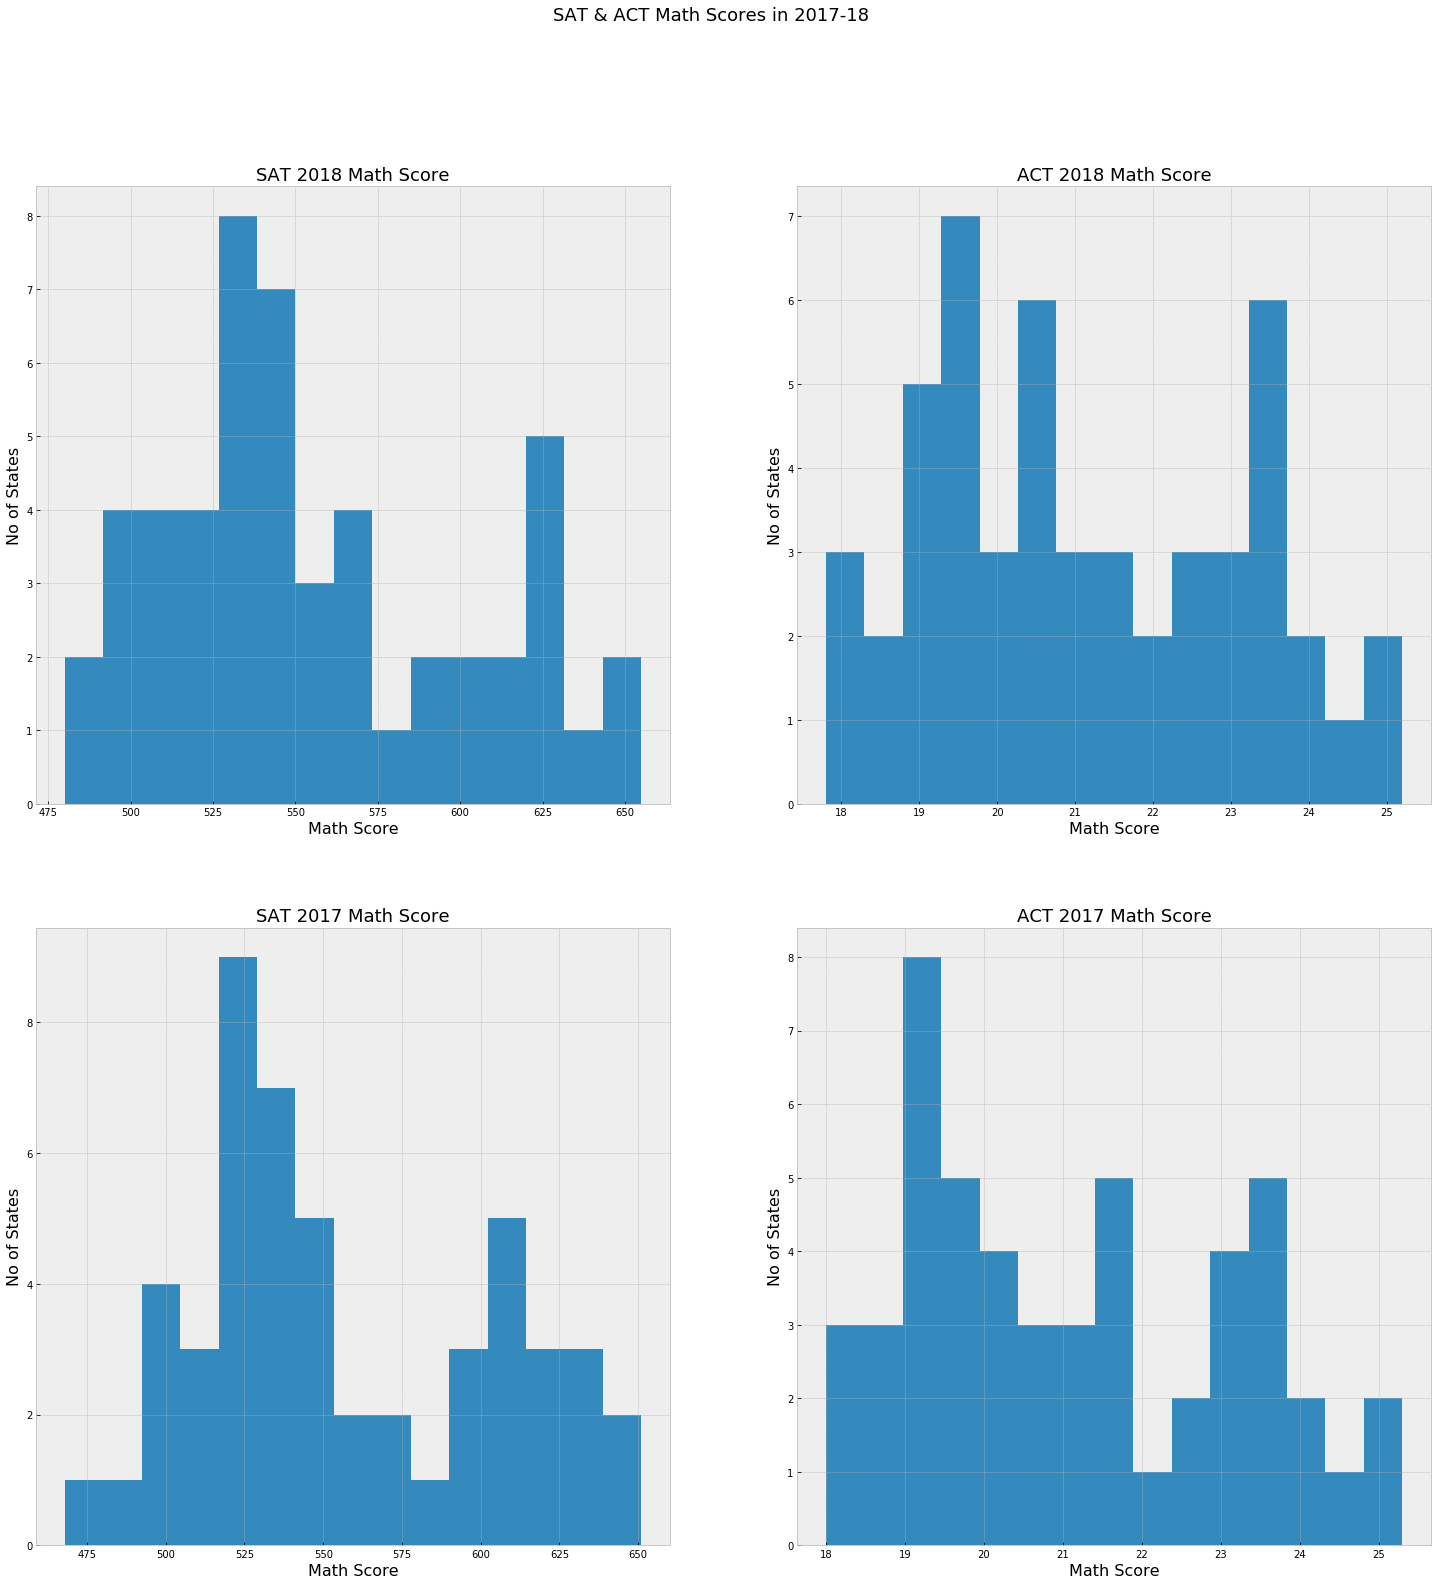

In [95]:
# Plotting Histograms for Math Scores for SAT & ACT
final_col = list(final.columns)
final_col = ['sat_2018_math','act_2018_math', 'sat_2017_math','act_2017_math']
titles = ['SAT 2018 Math Score', 'ACT 2018 Math Score', 'SAT 2017 Math Score', 'ACT 2017 Math Score']
subplot_histograms(final,final_col, titles, "No of States","Math Score","SAT & ACT Math Scores in 2017-18")

**No signficant improvement in performance for SAT and ACT Math Score YOY.**

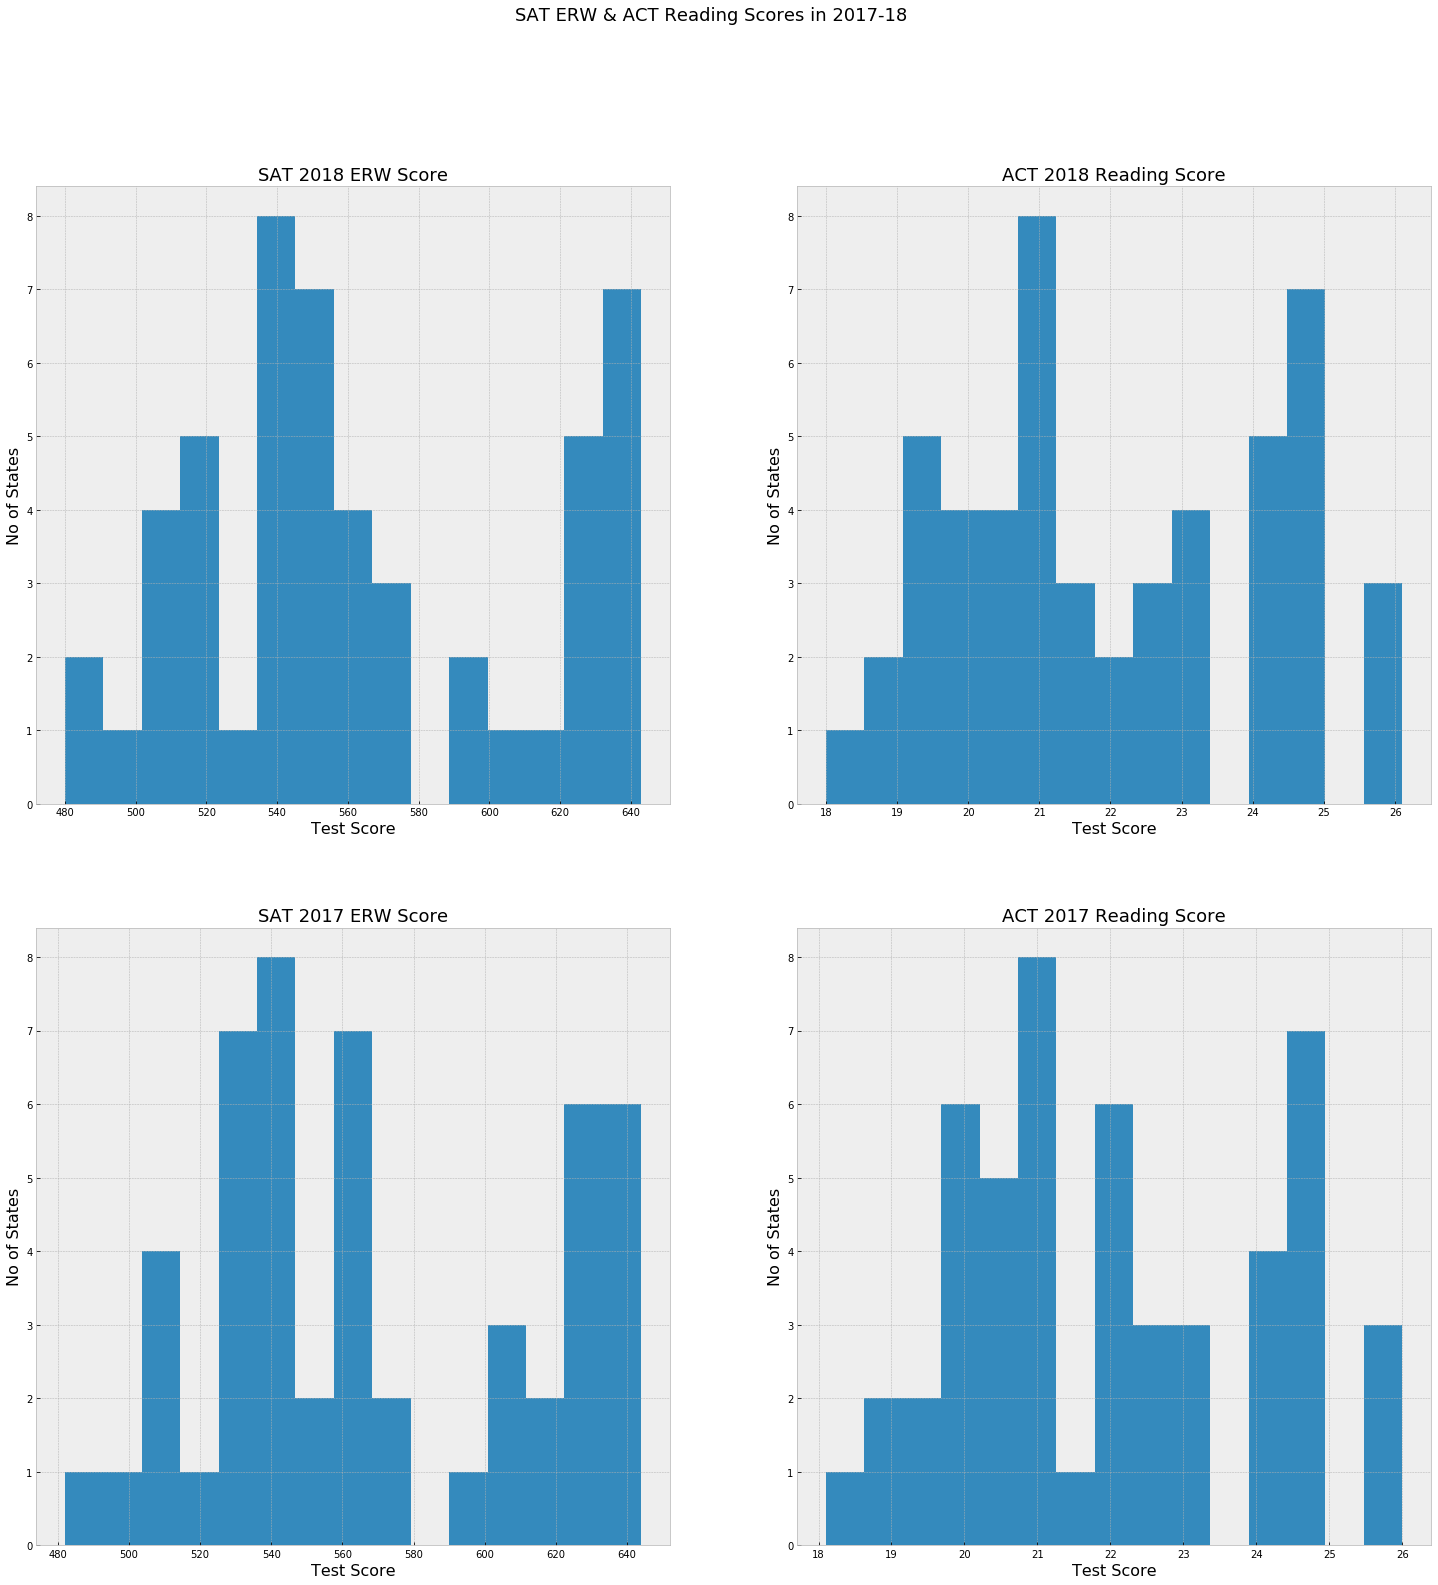

In [96]:
# Plotting Histograms for Reading/Verbal Scores for SAT & ACT
final_col = list(final.columns)
final_col = ['sat_2018_erw','act_2018_reading', 'sat_2017_erw','act_2017_reading']
titles = ['SAT 2018 ERW Score', 'ACT 2018 Reading Score', 'SAT 2017 ERW Score', 'ACT 2017 Reading Score']
subplot_histograms(final,final_col, titles, "No of States","Test Score","SAT ERW & ACT Reading Scores in 2017-18")

**No signficant improvement in performance for SAT ERW and ACT Reading Score YOY.**

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [97]:
def scatter_plot_sns(dataframe, x, y, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize = (8,6))
    sns.regplot(data=dataframe, x=x, y=y)
    ax.set(xlabel = xlabel, ylabel = ylabel, title = title)

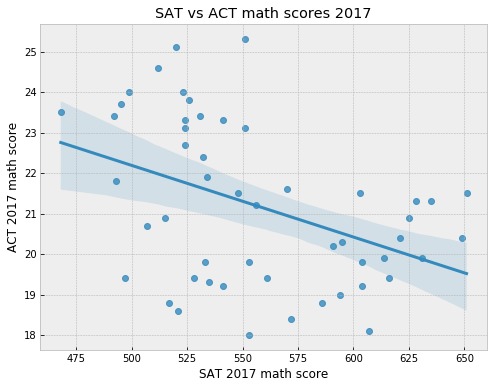

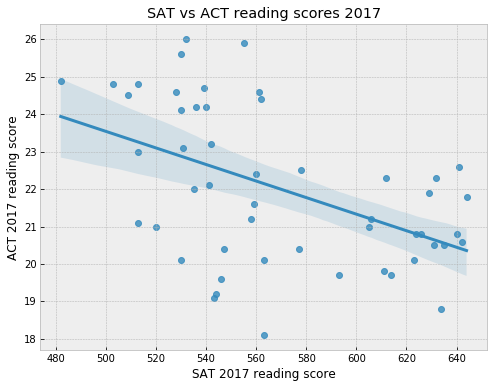

In [98]:
# Scatter Plot of SAT vs ACT Math Scores in 2017
scatter_plot_sns(final, 'sat_2017_math', 'act_2017_math', 'SAT 2017 math score', 'ACT 2017 math score', 'SAT vs ACT math scores 2017');
# Scatter Plot of SAT vs ACT Reading Scores in 2017
scatter_plot_sns(final, 'sat_2017_erw', 'act_2017_reading', 'SAT 2017 reading score', 'ACT 2017 reading score', 'SAT vs ACT reading scores 2017')

**Based on the above scatterplots, there does not seem to be any significant correlation between SAT and ACT Section Scores, only a weak negative correlation**

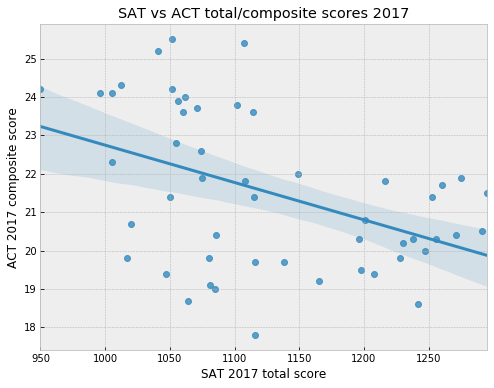

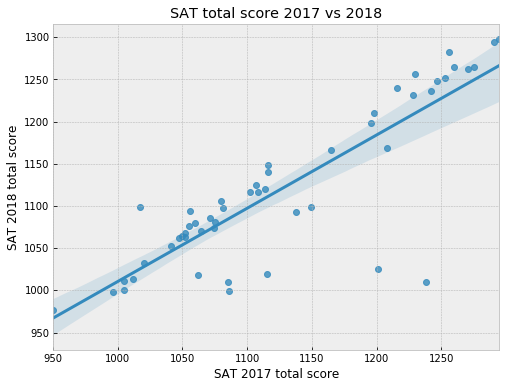

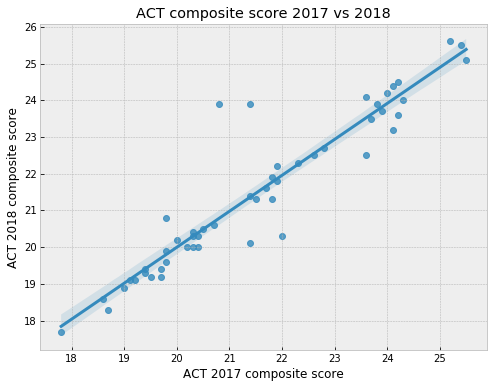

In [99]:
# Scatter Plot of SAT vs ACT Total/Composite Scores in 2017
scatter_plot_sns(final, 'sat_2017_total', 'act_2017_composite', 'SAT 2017 total score', 'ACT 2017 composite score', 'SAT vs ACT total/composite scores 2017');
# Scatter Plot of SAT Total Scores in 2017 vs 2018
scatter_plot_sns(final, 'sat_2017_total', 'sat_2018_total', 'SAT 2017 total score', 'SAT 2018 total score', 'SAT total score 2017 vs 2018');
# Scatter Plot of ACT Composite Scores in 2017 vs 2018
scatter_plot_sns(final, 'act_2017_composite', 'act_2018_composite', 'ACT 2017 composite score', 'ACT 2018 composite score', 'ACT composite score 2017 vs 2018');

**Based on the above scatterplots, there appears to be no significant correlation bewteen ACT and SAT Total Scores in 2017, only a weak negative correlation.**

**However, plotting ACT and SAT Scores YOY respectively shows that there is a significant correlation between respective SAT and ACT Total Scores YOY, a strong positive correlation.**

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

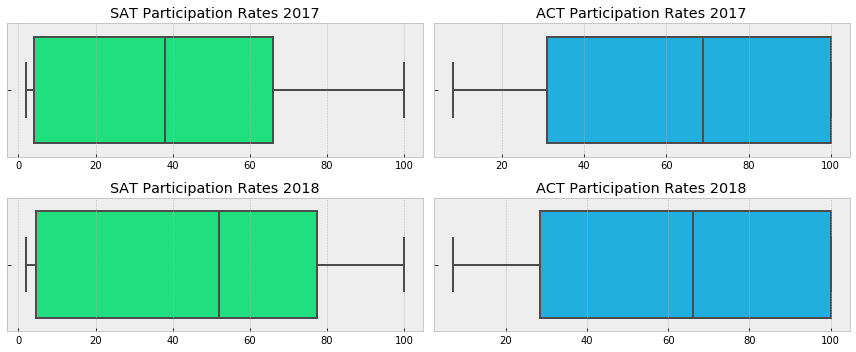

In [100]:
# Boxplots for Participation Rate
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,5))
sns.boxplot(final.sat_2017_participation, ax = ax[0,0], orient="h", color = 'springgreen').set(xlabel='', title='SAT Participation Rates 2017')
sns.boxplot(final.sat_2018_participation, ax = ax[1,0], orient="h", color = 'springgreen').set(xlabel='', title='SAT Participation Rates 2018')
sns.boxplot(final.act_2017_participation, ax = ax[0,1], orient="h", color = 'deepskyblue').set(xlabel='', title='ACT Participation Rates 2017')
sns.boxplot(final.act_2018_participation, ax = ax[1,1], orient="h", color = 'deepskyblue').set(xlabel='', title='ACT Participation Rates 2018')

plt.tight_layout()

**On average, SAT Participation Rates have improved YOY whereas ACT Participation Rates have remained constant YOY.**

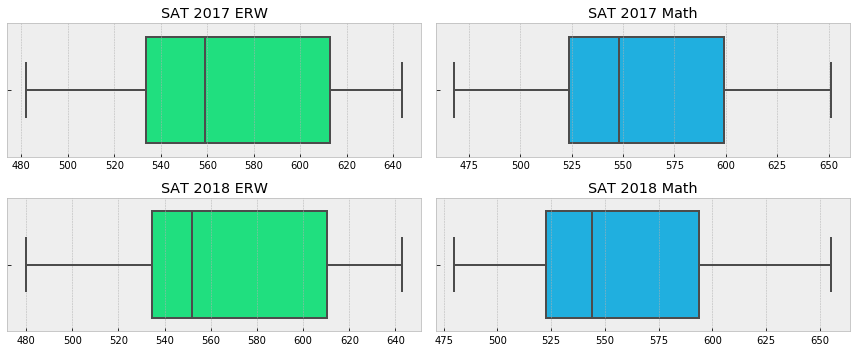

In [101]:
# Boxplots for SAT Evidence-based Reading and Math Scores YOY
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,5))
sns.boxplot(final.sat_2017_erw, ax = ax[0,0], orient="h", color = 'springgreen').set(xlabel='', title='SAT 2017 ERW')
sns.boxplot(final.sat_2018_erw, ax = ax[1,0], orient="h", color = 'springgreen').set(xlabel='', title='SAT 2018 ERW')
sns.boxplot(final.sat_2017_math, ax = ax[0,1], orient="h", color = 'deepskyblue').set(xlabel='', title='SAT 2017 Math')
sns.boxplot(final.sat_2018_math, ax = ax[1,1], orient="h", color = 'deepskyblue').set(xlabel='', title='SAT 2018 Math')

plt.tight_layout()

**On Average, SAT ERW Score Performance has remained constant while SAT Math Score Performance has decreased YOY.**


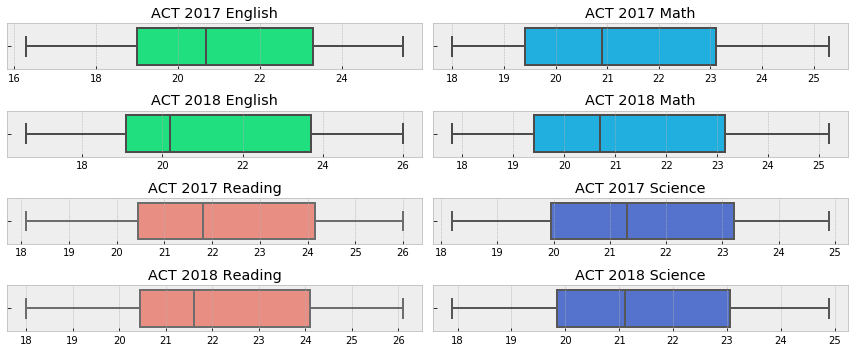

In [102]:
# Boxplots for ACT English, Math, Reading, Science scores YOY
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (12,5))
sns.boxplot(final.act_2017_english, ax = ax[0,0], orient="h", color = 'springgreen').set(xlabel='', title='ACT 2017 English')
sns.boxplot(final.act_2018_english, ax = ax[1,0], orient="h", color = 'springgreen').set(xlabel='', title='ACT 2018 English')
sns.boxplot(final.act_2017_math, ax = ax[0,1], orient="h", color = 'deepskyblue').set(xlabel='', title='ACT 2017 Math')
sns.boxplot(final.act_2018_math, ax = ax[1,1], orient="h", color = 'deepskyblue').set(xlabel='', title='ACT 2018 Math')
sns.boxplot(final.act_2017_reading, ax = ax[2,0], orient="h", color = 'salmon').set(xlabel='', title='ACT 2017 Reading')
sns.boxplot(final.act_2018_reading, ax = ax[3,0], orient="h", color = 'salmon').set(xlabel='', title='ACT 2018 Reading')
sns.boxplot(final.act_2017_science, ax = ax[2,1], orient="h", color = 'royalblue').set(xlabel='', title='ACT 2017 Science')
sns.boxplot(final.act_2018_science, ax = ax[3,1], orient="h", color = 'royalblue').set(xlabel='', title='ACT 2018 Science')

plt.tight_layout()

**ACT Subject Test Score Performances have on average remained constant YOY.**

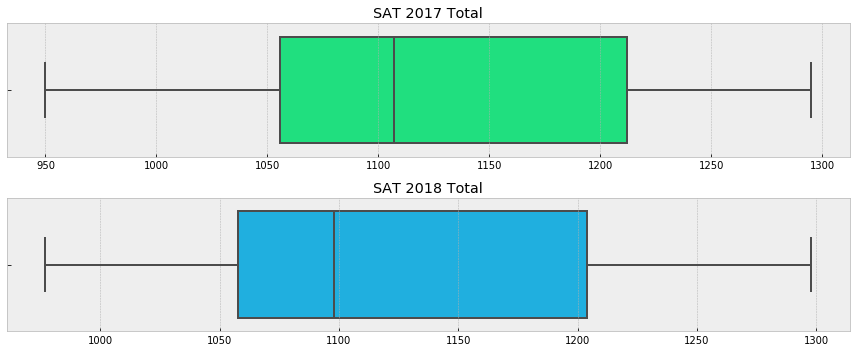

In [103]:
# Boxplots for SAT Total Score YOY
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,5))
sns.boxplot(final.sat_2017_total, ax = ax[0], orient="h", color = 'springgreen').set(xlabel='', title='SAT 2017 Total')
sns.boxplot(final.sat_2018_total, ax = ax[1], orient="h", color = 'deepskyblue').set(xlabel='', title='SAT 2018 Total')

plt.tight_layout()

**Total SAT Score Performance has decreased YOY and this can be attributed to the lower SAT Math Test Score Performance YOY.**

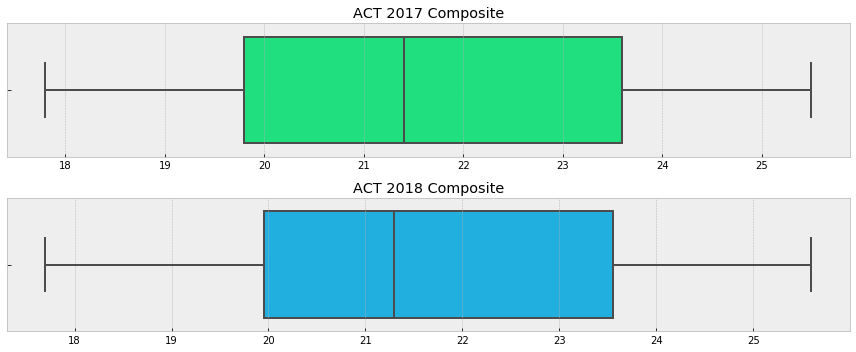

In [104]:
# Boxplots for ACT Composite Score YOY
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,5))
sns.boxplot(final.act_2017_composite, ax = ax[0], orient="h", color = 'springgreen').set(xlabel='', title='ACT 2017 Composite')
sns.boxplot(final.act_2018_composite, ax = ax[1], orient="h", color = 'deepskyblue').set(xlabel='', title='ACT 2018 Composite')

plt.tight_layout()

**Composite ACT Score Performance has remained constant YOY and this can be attributed to the constant ACT Subject Score Performances YOY.**

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [105]:
# Creating a Participation YOY Change Column
final['sat_yoy_change'] = final['sat_2018_participation'] - final['sat_2017_participation']
final['act_yoy_change'] = final['act_2018_participation'] - final['act_2017_participation']

In [106]:
final['sat_yoy_change'].head()

0    1.0
1    5.0
2   -1.0
3    2.0
4    7.0
Name: sat_yoy_change, dtype: float64

In [107]:
final['act_yoy_change'].head()

0     0.0
1   -32.0
2     4.0
3     0.0
4    -4.0
Name: act_yoy_change, dtype: float64

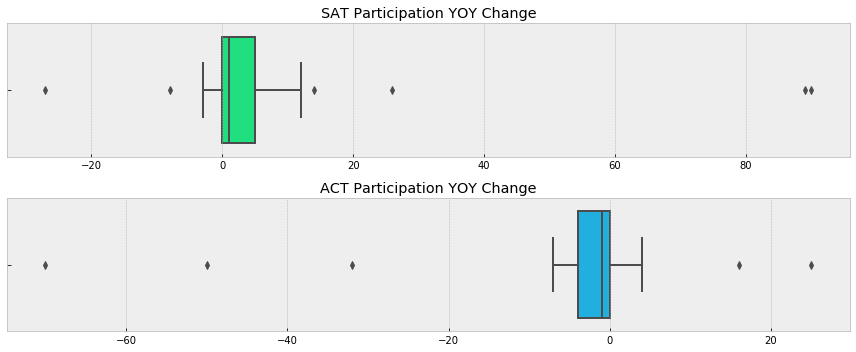

In [108]:
# Plotting a boxplot of SAT and ACT Participation YOY Change
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,5))
sns.boxplot(final.sat_yoy_change, ax = ax[0], orient="h", color = 'springgreen').set(xlabel='', title='SAT Participation YOY Change')
sns.boxplot(final.act_yoy_change, ax = ax[1], orient="h", color = 'deepskyblue').set(xlabel='', title='ACT Participation YOY Change')

plt.tight_layout()

**Since the key focus of this project analysis is to identify where money is best spent to improve SAT and ACT participation rates, I decided to extend my analysis by identifying the US States that have shown the highest improvement in Participation rates for SAT and ACT tests YOY from 2017 - 2018.**

In [109]:
# States that have shown the highest YOY change in terms of SAT Participation Rates
final.sort_values(by=['sat_yoy_change'], ascending=False).head(5)[['state','sat_yoy_change']]

,state,sat_yoy_change
13,Illinois,90.0
5,Colorado,89.0
39,Rhode Island,26.0
48,West Virginia,14.0
30,New Jersey,12.0


In [110]:
# Examining the SAT Participation Rates of Illinois and Chicago
final.sort_values(by=['sat_yoy_change'], ascending=False).head(2)[['state','sat_yoy_change','sat_2017_participation','sat_2018_participation']]

,state,sat_yoy_change,sat_2017_participation,sat_2018_participation
13,Illinois,90.0,9.0,99.0
5,Colorado,89.0,11.0,100.0


In [111]:
# Examining the ACT Participation Rates of Illinois and Chicago
final.sort_values(by=['sat_yoy_change'], ascending=False).head(2)[['state','sat_yoy_change','act_2017_participation','act_2018_participation']]

,state,sat_yoy_change,act_2017_participation,act_2018_participation
13,Illinois,90.0,93.0,43.0
5,Colorado,89.0,100.0,30.0


In [112]:
# States that have shown the highest YOY change in terms of ACT Participation Rates
final.sort_values(by=['act_yoy_change'], ascending=False).head(5)[['state','act_yoy_change']]

,state,act_yoy_change
36,Ohio,25.0
27,Nebraska,16.0
2,Arizona,4.0
20,Maryland,3.0
37,Oregon,2.0


After identifying the states on the right hand side of the boxplots, we have found that the top 2 US States that have exhibited significant improvements in SAT Participation Rate YOY are **Illinois and Colorado**.

In addition, the top 2 US States that have exhibited signficiant improvements in ACT Participation Rate YOY are **Ohio and Nebraska**.

We will conduct further deep-dives into the reasons behind the improvements in these States; participation rates in our 'Outside Research' Section later on.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

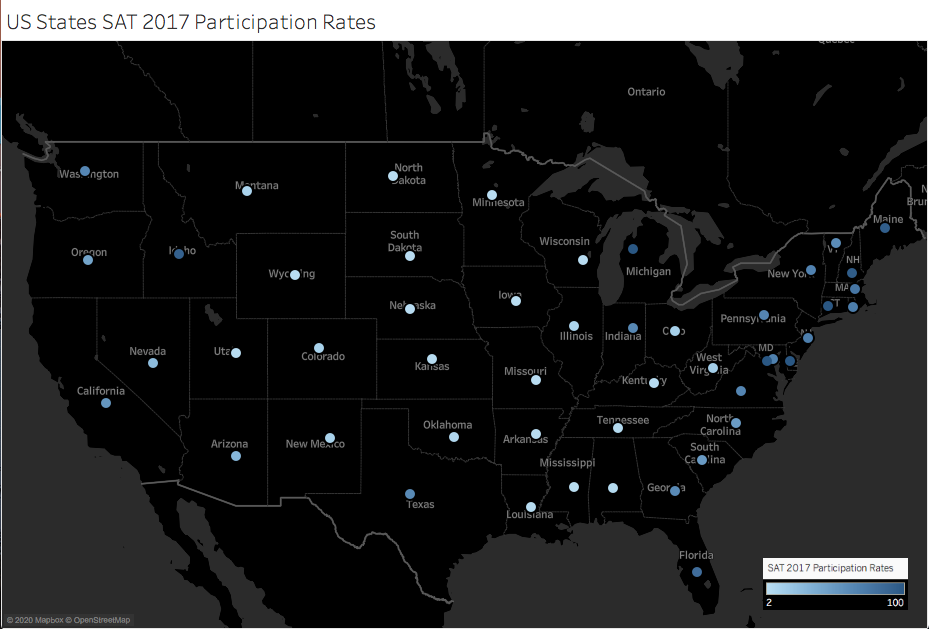

In [1]:
from IPython.display import Image
Image(filename = '../data/sat_2017_participation_image.png')

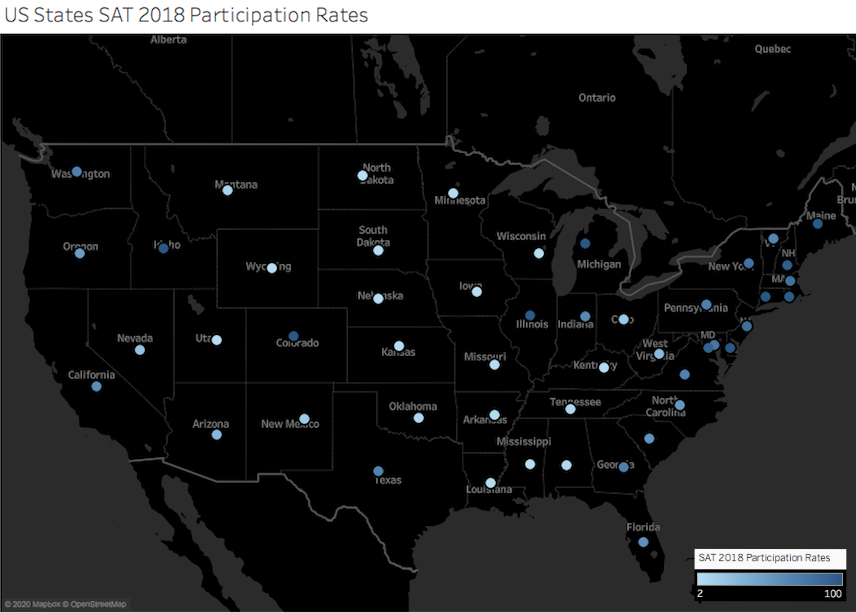

In [2]:
Image(filename = '../data/sat_2018_participation_image.png')

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [113]:
# Summary Statistics of Final Dataset Transposed
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_2018_participation,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
sat_2018_erw,51.0,563.686275,47.502627,480.0,534.50,552.0,610.50,643.0
sat_2018_math,51.0,556.235294,47.772623,480.0,522.50,544.0,593.50,655.0
sat_2018_total,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0
act_2018_participation,51.0,61.647059,34.080976,7.0,28.50,66.0,100.00,100.0
act_2018_composite,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6
act_2018_english,51.0,20.988235,2.446356,16.6,19.10,20.2,23.70,26.0
act_2018_math,51.0,21.125490,2.035765,17.8,19.40,20.7,23.15,25.2
act_2018_reading,51.0,22.015686,2.167245,18.0,20.45,21.6,24.10,26.1
act_2018_science,51.0,21.345098,1.870114,17.9,19.85,21.1,23.05,24.9


In [114]:
# Comparing the mean and median(50%) of variables in the final dataset
final.describe().T[['mean','50%']]

,mean,50%
sat_2018_participation,45.745098,52.0
sat_2018_erw,563.686275,552.0
sat_2018_math,556.235294,544.0
sat_2018_total,1120.019608,1098.0
act_2018_participation,61.647059,66.0
act_2018_composite,21.486275,21.3
act_2018_english,20.988235,20.2
act_2018_math,21.125490,20.7
act_2018_reading,22.015686,21.6
act_2018_science,21.345098,21.1


In [115]:
# checking the skew of each variable in the dataset
final.skew()

sat_2018_participation    0.136228
sat_2018_erw              0.282300
sat_2018_math             0.530407
sat_2018_total            0.466432
act_2018_participation   -0.021916
act_2018_composite        0.281962
act_2018_english          0.371507
act_2018_math             0.269548
act_2018_reading          0.201361
act_2018_science          0.172383
sat_2017_participation    0.346450
sat_2017_erw              0.272693
sat_2017_math             0.365040
sat_2017_total            0.310903
act_2017_participation   -0.197989
act_2017_english          0.352660
act_2017_math             0.332683
act_2017_reading          0.269366
act_2017_science          0.218823
act_2017_composite        0.319810
sat_yoy_change            3.864080
act_yoy_change           -3.274447
dtype: float64

Answers:


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

**Answer:** Not completely true.

This Assumption does not hold for:
    - Math
    - Reading
    - Participation Rates
    
as they are all not normally distributed. They all have a skew in their distribtuion that is not equal to zero.

The data collected is sampled based on State, hence the data might not be as randomly sampled to the level that a normal distribution requires.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**Answer:**

No. Statistical inference is conducted only when the data is a sample of the population. The datasets that we have provide data for all students in all states. Therefore, we are analyzing a population and not a sample using our data.

Given this, it does not really make sense to conduct statistical inference. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:

No. In the US, students take either the SAT or ACT test as part of their requirements for College Applications. The Math Segments for the SAT and ACT are different in terms of format, timing and assessment. Hence, without a standardized benchmark, it will not be approrpriate or accurate to compare these specific Math Scores even it is a common subject field.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

### Research on SAT School Day Program from College Board Website

- The SAT School Day Program, which allows students to take the SAT during regular school hours usually at no cost, continues to expand.

- More than 2.1 million students in the class of 2018 took the SAT, an increase of 25% over the class of 2017, according to the 2018  SAT Suite of Assessments Program Results. 

- In 2014-15, only 4 states (Delaware, Idaho, Maine, District of Columbia) participated in SAT School Day. 

- In 2017-18, 10 states (Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island, West Virginia, District of Columbia) administered the SAT to public school students for free.

**Overall increased Participation in SAT School Day Program (27% in 2017 to 36% in 2018).**

### Case Study Research on Manadory SAT Testing Regulations for States like Colorado and Illinois.

- Colorado and Illinois switched from ACT Testing to mandatory SAT Testing in Spring 2017.

- This was due to statewide high school accountability and every student in those states is now required to participate in SAT Testing.

- In 2017-18, 10 states (**Colorado**, Connecticut, Delaware, Idaho, **Illinois**, Maine, Michigan, New Hampshire, Rhode Island, and West Virginia, District of Columbia) covered the cost of the SAT for all their public school students.

Source: College Board Website, Educationn Week News

### Senior Class of 2018 SAT vs ACT Preference Map

Source: Wikipedia

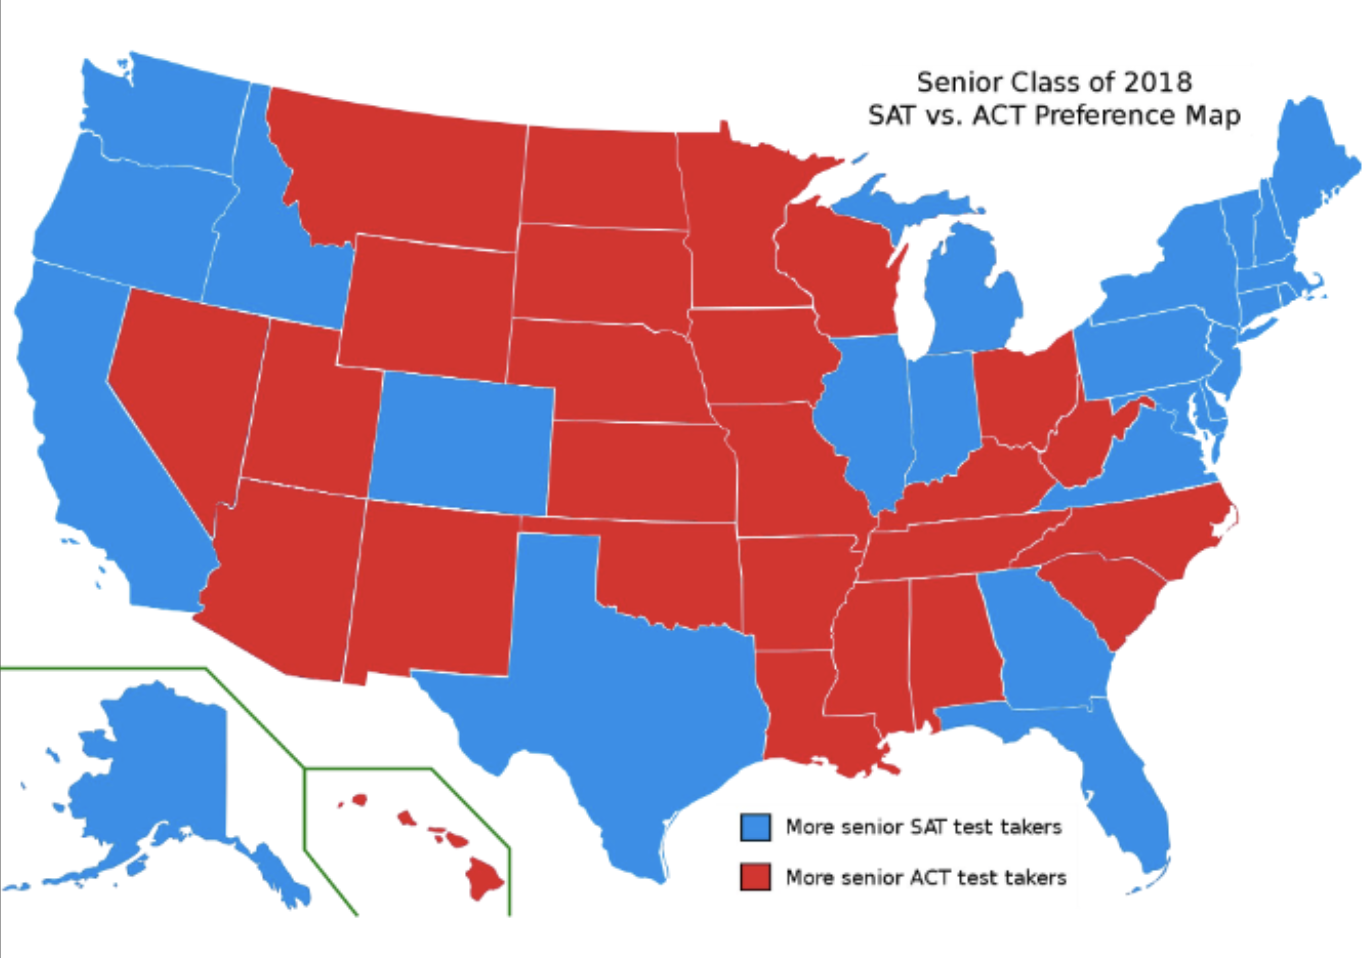

In [3]:
Image(filename = '../data/2018_US_Heat Map.png')

- There are strong regional (and possibly political) affiliations associated with ACT versus SAT participation rates. Coastal progressive states tend to favor the SAT, while Midwestern and Mountain conservative states tend to favor the ACT.

- The Red Colored States are the main areas for College Board to focus its financial resources on in order to increase SAT Participation Rates in these States.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

After analyzing the datasets and synthesizing my findings, the 3 key reasons why SAT Participation Rates are low in certain US States are as such:

1. Many US States with low SAT Participation Rates have very high ACT Participation Rates as certain States prefer their students to take 1 particular test (ACT) over the SAT test.

2. Administering tests can be costly for poorer States and in public schools as well. Increasing access to free tests could be the key in swaying certain US States to adopt one test over the other.

3. Making tests mandatory and enforcing higher school accountability could also significantly increase test participation rates.

### Recommendation 1 - Improve Attractiveness

**Promoting SAT Test to US States that predominantly administer ACT Tests for its students.**

- Demonstrate the advantages of SAT testing
- Make the SATs more attractive to student and States


### Recommendation 2 - Improve Accessibility

**Increasing access for US States to SAT School Day Programs**

- Cost-saving incentives for poorer states and public schools
- Improve access to free preparation material for students

### Recommendation 3 - Improve Reforms

**Promote mandatory SAT Testing for US States over ACT Testing**

- Enforce statewide high school accountability across US States.

## References

- Wheeler, Danny. “Colorado Changed to the SAT in 2017: What You Need to Know.” Testive, 10 July 2018, www.testive.com/colorado-sat-change-2017/

- Genota, Lauraine. “SAT Scores Rise as Number of Test-Takers Tops 2 Million.” Education Week, 20 Feb. 2019, www.edweek.org/ew/articles/2018/10/31/sat-scores-rise-as-number-of-test-takers.html

- “More Than 2 Million Students in the Class of 2018 Took the SAT, Highest Ever.” The College Board, 18 Mar. 2019, www.collegeboard.org/releases/2018/more-than-2-million-students-in-class-of-2018-took-sat-highest-ever

- “File:SAT-ACT-Preference-Map.svg.” File:SAT-ACT-Preference-Map.svg - Wikimedia Commons, commons.wikimedia.org/wiki/File:SAT-ACT-Preference-Map.svg

- “SAT School Day.” SAT Suite of Assessments, 11 May 2018, collegereadiness.collegeboard.org/sat/k12-educators/sat-school-day.

- Veiga, Christina. “New York City Offers SAT to All High School Juniors, Hoping to Clear a Path to College.” Chalkbeat New York, Chalkbeat New York, 3 Apr. 2017, ny.chalkbeat.org/2017/4/3/21099704/new-york-city-offers-sat-to-all-high-school-juniors-hoping-to-clear-a-path-to-college.
